Pada tugas kali ini, kita akan mencoba untuk membuat model dari data training untuk mengklasifikasikan data_uji.

Kita ingin melihat dengan fitur yang dimiliki apakah penumpang tersebut akan selamat atau tidak.

Algoritma yang akan kita gunakan adalah logistic regression.


In [ ]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

2. Data Collection


In [ ]:
#panggil data kalian dan masukkan pada dua variabel data_mentah untuk train dan data_uji untuk data_uji
data_mentah = pd.read_csv('train.csv')
data_uji = pd.read_csv('data_uji.csv')
#tampilkan head dari data_mentah
data_mentah.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [ ]:
#tampilkan head dari data_uji
data_uji.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


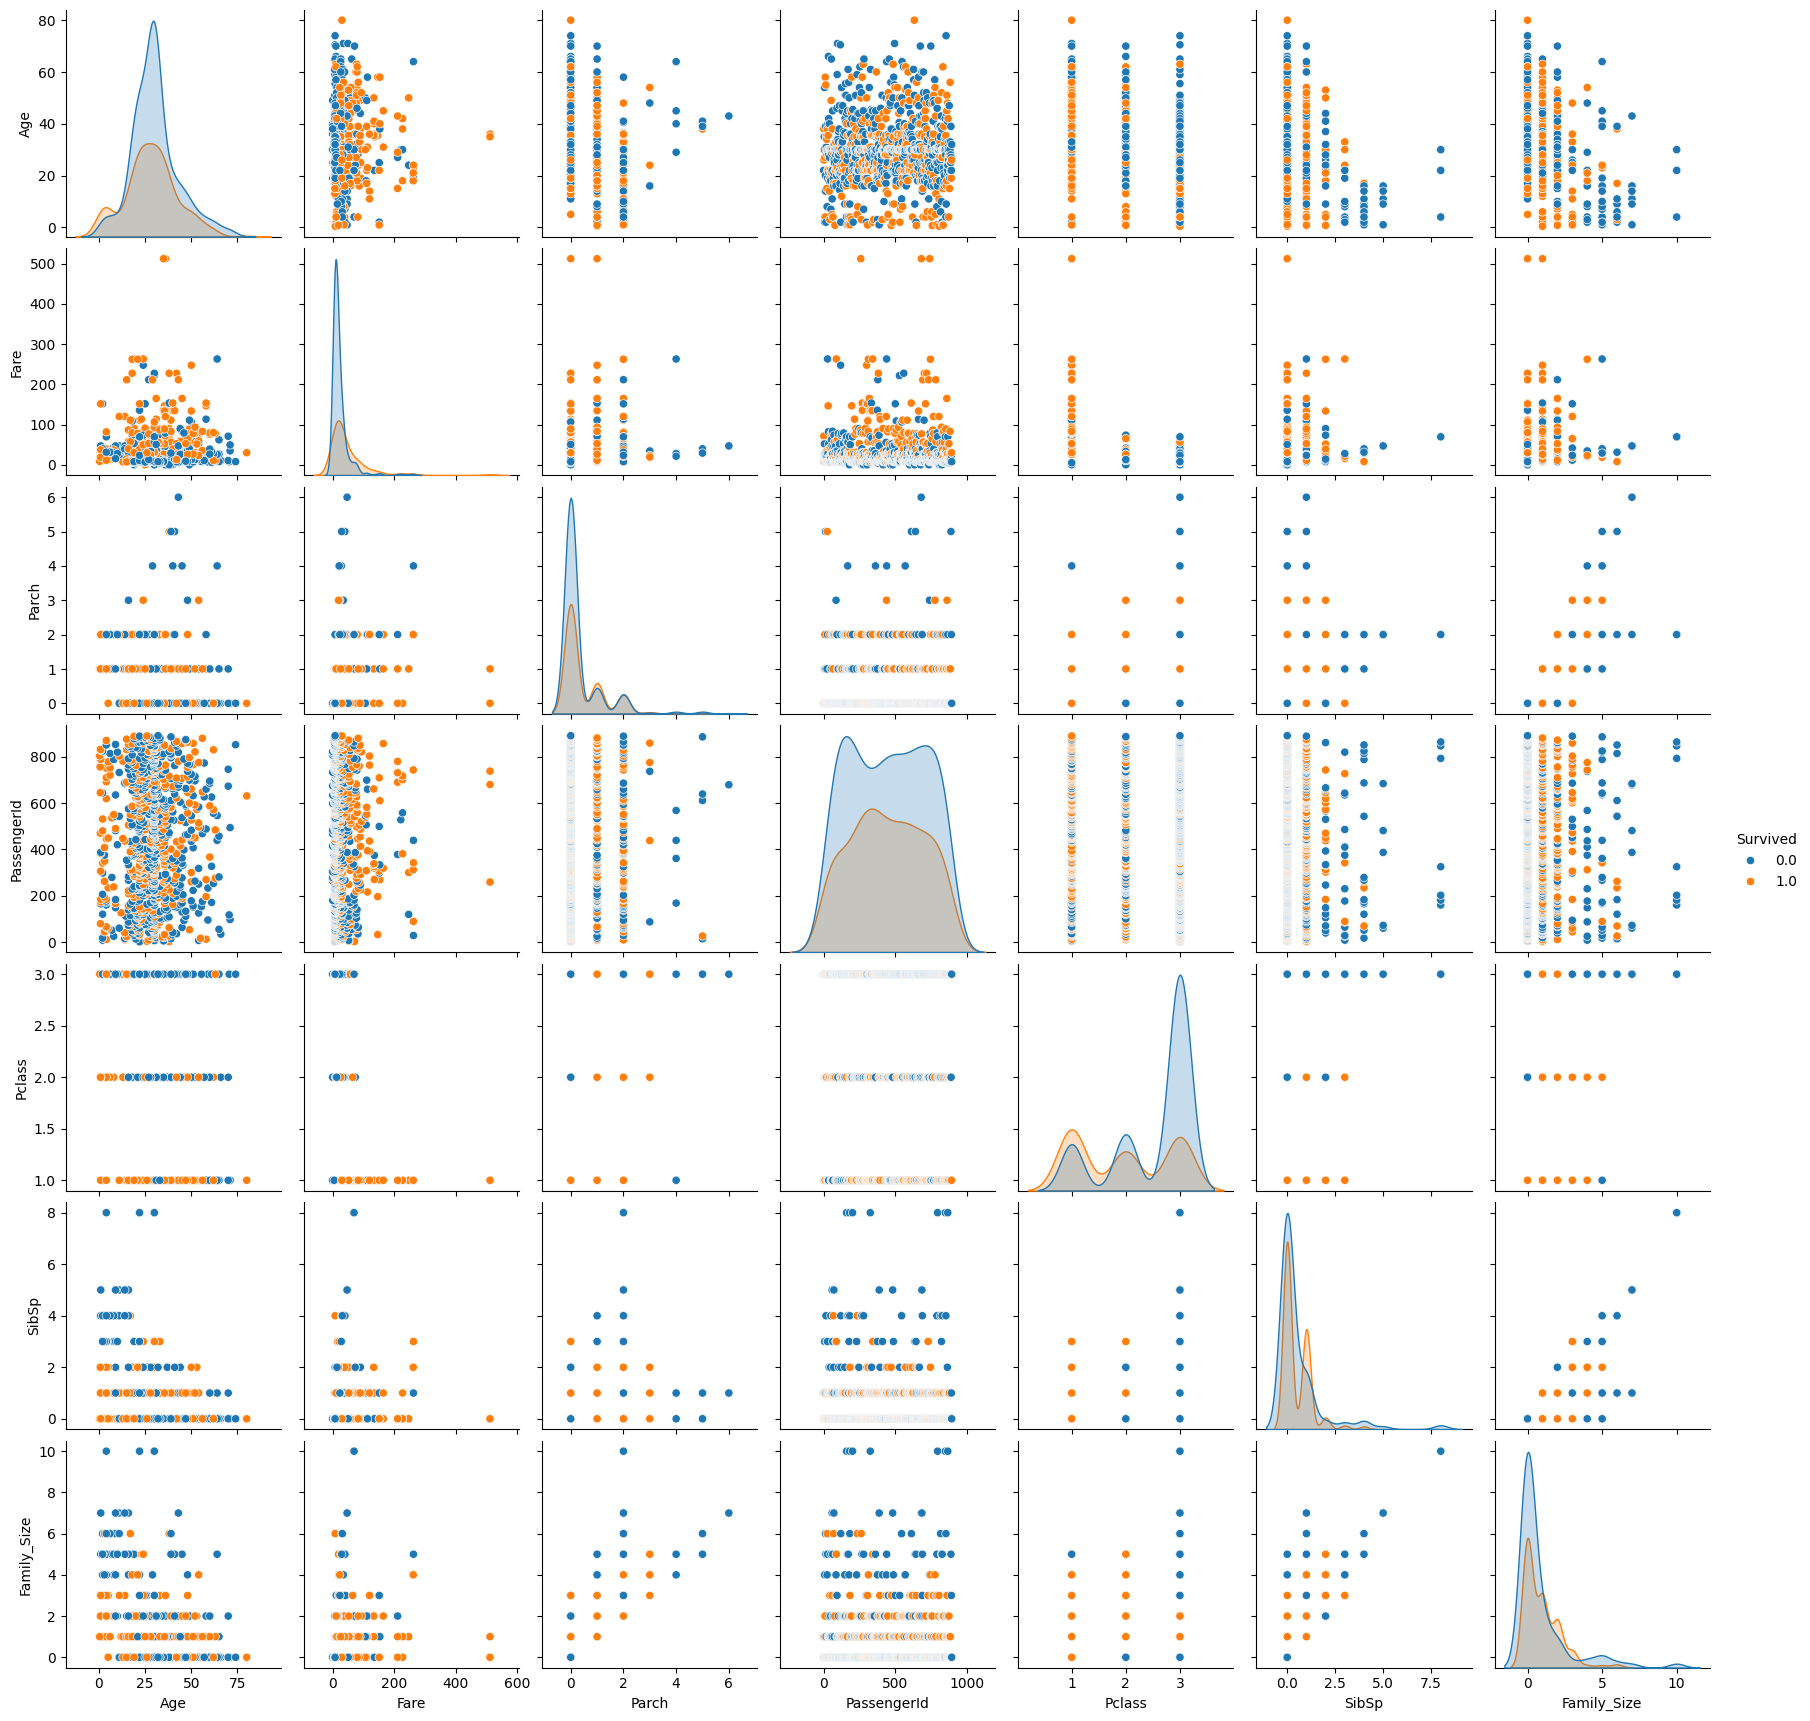

In [ ]:
sns.pairplot(data_mentah, hue='Survived')

3. Data Preparation

Pada bagian ini kita akan memperbaiki nan value

In [ ]:
#Check detail dan nilai NaN pada data_mentah. gunakan print untuk Nilai NaN
data_mentah.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [ ]:
#Check detail dan nilai NaN pada data_uji. gunakan print untuk Nilai NaN
data_uji.isnull().sum()

Age             0
Cabin          10
Embarked        0
Fare            0
Name            0
Parch           0
PassengerId     0
Pclass          0
Sex             0
SibSp           0
Survived       10
Ticket          0
Title           0
Family_Size     0
dtype: int64

In [ ]:
#drop kolom yang tidak dibutuhkan dari kedua dataframe
data_mentah = data_mentah.drop([ 'Cabin', 'Embarked', 'Name', 'Parch', 'Sex', 'Title'], axis=1)
data_uji = data_uji.drop(['Cabin', 'Embarked', 'Name', 'Parch', 'Sex', 'Title'], axis=1)

In [ ]:
#lakukan data wrangling pada data
data_mentah.fillna(method='ffill', inplace=True)

In [ ]:
#feature selection

columns = ["Age", "Fare", "PassengerId", "Pclass", "SibSp", "Survived", "Family_Size"]

data = data_mentah.loc[:, columns]
data.head()

,Age,Fare,PassengerId,Pclass,SibSp,Survived,Family_Size
0,22.0,7.2500,1,3,1,0.0,1
1,38.0,71.2833,2,1,1,1.0,1
2,26.0,7.9250,3,3,0,1.0,0
3,35.0,53.1000,4,1,1,1.0,1
4,35.0,8.0500,5,3,0,0.0,0


Sekarang kita akan membagi data_mentah menjadi data training dan test


In [ ]:
#kita bagi menjadi data training dan test dengan test_size = 0.2
#pembagian data

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

display(x)
display(y)

,Age,Fare,PassengerId,Pclass,SibSp,Survived
0,22.0,7.2500,1,3,1,0.0
1,38.0,71.2833,2,1,1,1.0
2,26.0,7.9250,3,3,0,1.0
3,35.0,53.1000,4,1,1,1.0
4,35.0,8.0500,5,3,0,0.0
...,...,...,...,...,...,...
886,27.0,13.0000,887,2,0,0.0
887,19.0,30.0000,888,1,0,1.0
888,22.0,23.4500,889,3,1,0.0
889,26.0,30.0000,890,1,0,1.0


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_Size, Length: 891, dtype: int64

In [ ]:
#pembagian data training dan testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)

(712, 6)

(179, 6)

4. Data Processing

In [ ]:
#training model
#langsung gunakan object logistic regression yang sudah dibuat sebelumnya
# fit the model with data
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Evaluasi
#kita buat variabel y_predict
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [ ]:
#import modul metrics dari sklearn. Taruh pada sel package/library di awal
#test nilai accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Nilai akurasi adalah: {accuracy}")

Nilai akurasi adalah: 0.6033519553072626


Sekarang kita akan mencoba mengklasifikasikan data_uji kita

In [ ]:
#1. buat sebuah variabel untuk menampung kolom dari data_uji. Ingat kolom yang dipilih harus sama dengan semua kolom pada saat memilih X
#2. lakukan prediksi dengan menggunakan variabel pada poin satu.
#3. masukkan variabel pada poin dua pada data uji kolom Survived
#4. tampilkan data_uji
columns_2 = ["Age", "Fare", "PassengerId", "Pclass", "SibSp", "Survived"]

uji_data = data_uji.loc[:, columns_2]
uji_data = uji_data.fillna(method='ffill')
y = model.predict(uji_data)
data_uji['Survived'] = y
print(data_uji)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#tuliskan hasil analisa kalian disini